In [1]:
import glob
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# 波形データの作成
fs = 10 ** 4
N = 10 ** 5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500 * np.cos(2 * np.pi * 0.25 * time)
carrier = amp * np.sin(2 * np.pi * 3e3 * time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time / 5)
x = carrier + noise

# スペクトログラム分析の実施
f, t, Sxx = signal.spectrogram(x, fs)

print(x.shape, fs)
print(x)
print(f.shape, t.shape, Sxx.shape)

(100000,) 10000
[ -3.42366469   4.21877167 -10.71814359 ...  -0.0315446   -3.24343302
   0.64000378]
(129,) (446,) (129, 446)


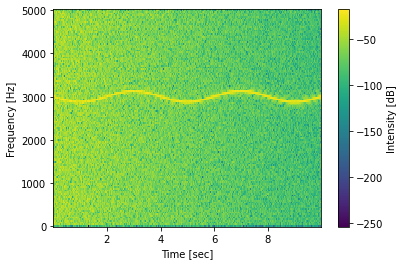

In [3]:
# 図の描画
plt.pcolormesh(t, f, 10 * np.log(Sxx))  # intensityを修正
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
cbar = plt.colorbar()  # カラーバー表示のため追加
cbar.ax.set_ylabel("Intensity [dB]")  # カラーバーの名称表示のため追加
plt.show()

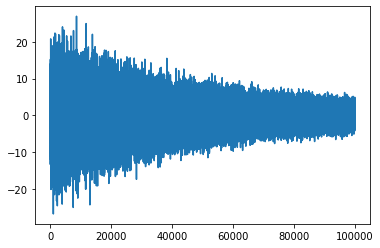

In [4]:
# xを普通にプロット
plt.plot(x)

In [5]:
# npyファイルを読み込む
data = np.load("../data/0aa8d07_0.npy").T[0]
print(data.shape)
print(data)

(3000,)
[-101.43956044  -97.48351648  -92.2967033  ...  -12.20879121  -62.75824176
  -67.32967033]


In [6]:
# スペクトログラムを作成
f, t, Sxx = signal.spectrogram(data, len(data) // 10)
print(f.shape, t.shape, Sxx.shape)

(129,) (13,) (129, 13)


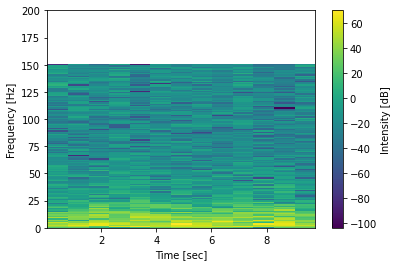

In [7]:
# スペクトログラムをプロット
plt.ylim([0, 200])
plt.pcolormesh(t, f, 10 * np.log(Sxx))
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Intensity [dB]")
# plt.savefig("sp.png")
plt.show()

In [8]:
def spectrogram(data, window_size=256, overlap=0.5, fft_size=256):
    # ステップ数を計算する
    step = int((1 - overlap) * window_size)

    # ステップ数分のデータを切り出す
    sliced_data = [data[i : i + window_size] for i in range(0, len(data) - window_size + 1, step)]

    # データを窓関数で加工する
    window = np.hanning(window_size)
    windowed_data = [d * window for d in sliced_data]

    # FFTを行う
    fft_data = [np.fft.fft(d, fft_size) for d in windowed_data]

    # 結果をスペクトログラムに変換する
    dst = np.array([np.abs(d) for d in fft_data])

    return dst

(22, 256)


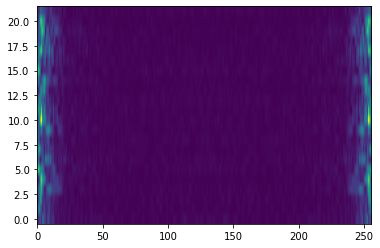

In [9]:
# リストのデータをスペクトログラムに変換する
img_spec = spectrogram(data)
print(img_spec.shape)
# 画像に変換
plt.imshow(img_spec, aspect="auto", origin="lower")
plt.show()

In [10]:
npy_files = glob.glob("../data/arrays/*.npy")
np.random.shuffle(npy_files)

channels = [
    "EEG Fpz-Cz",
    "EEG Pz-Oz",
    "EOG horizontal",
    "Resp oro-nasal",
    "EMG submental",
    "Temp rectal",
    "Event marker"
]

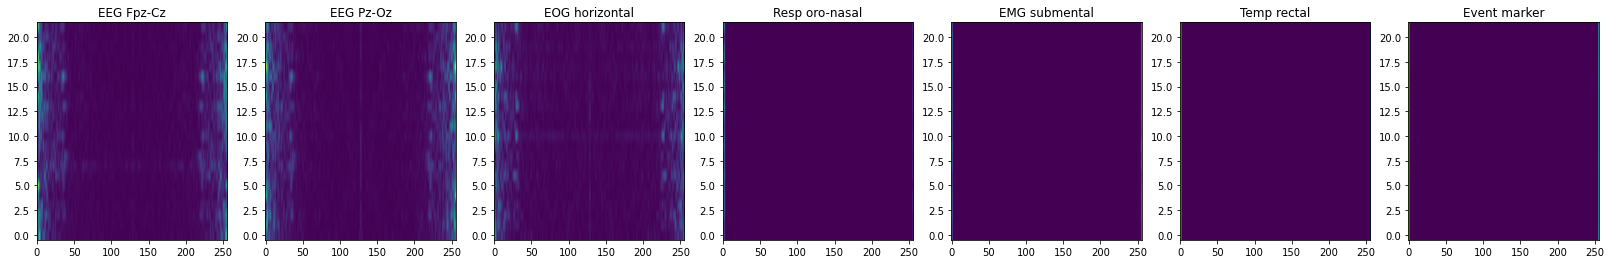

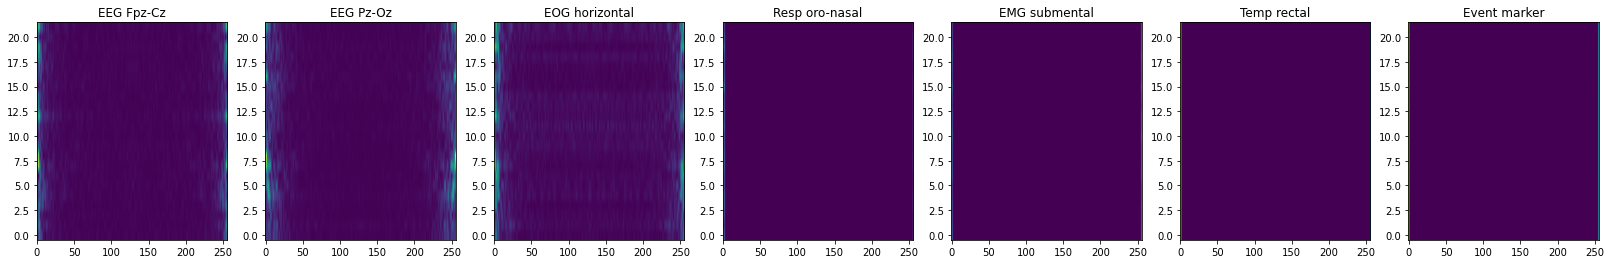

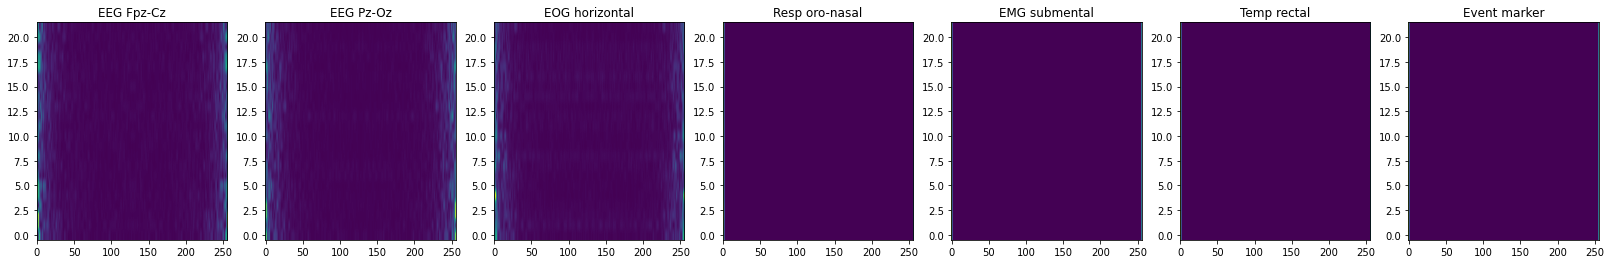

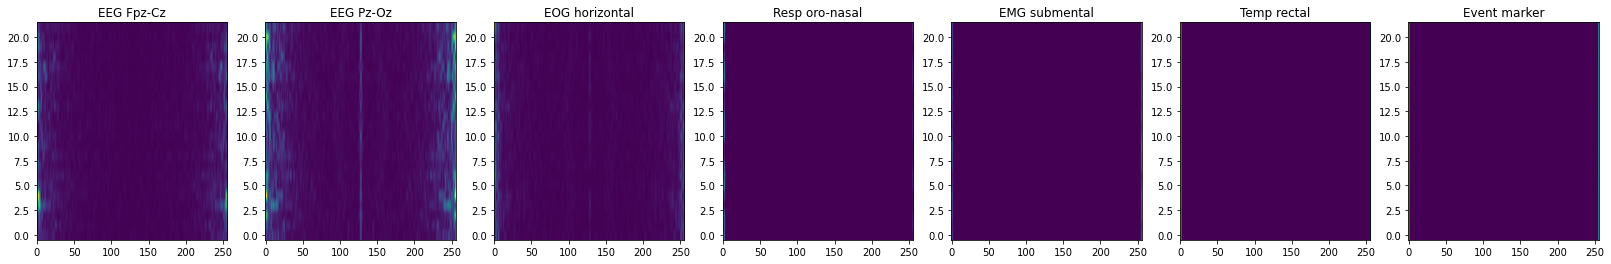

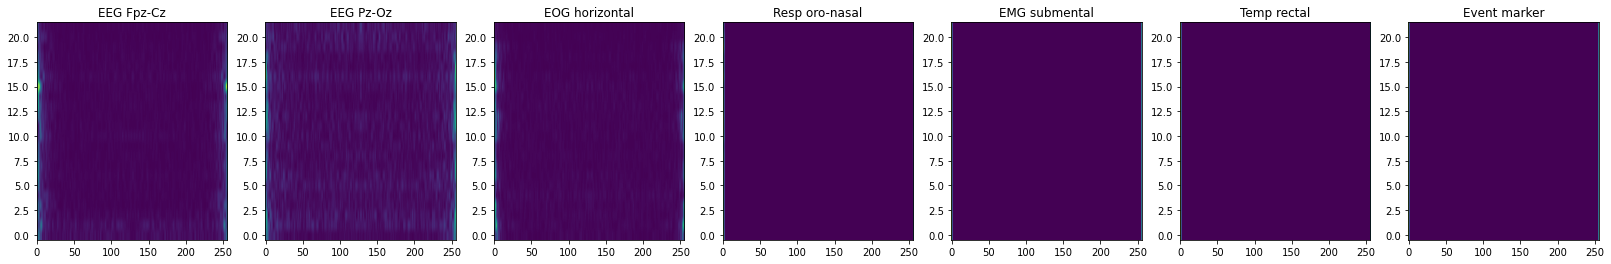

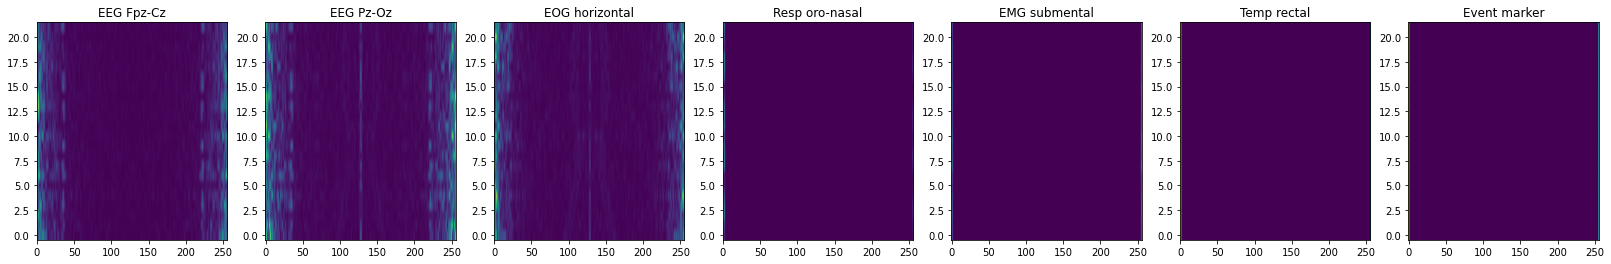

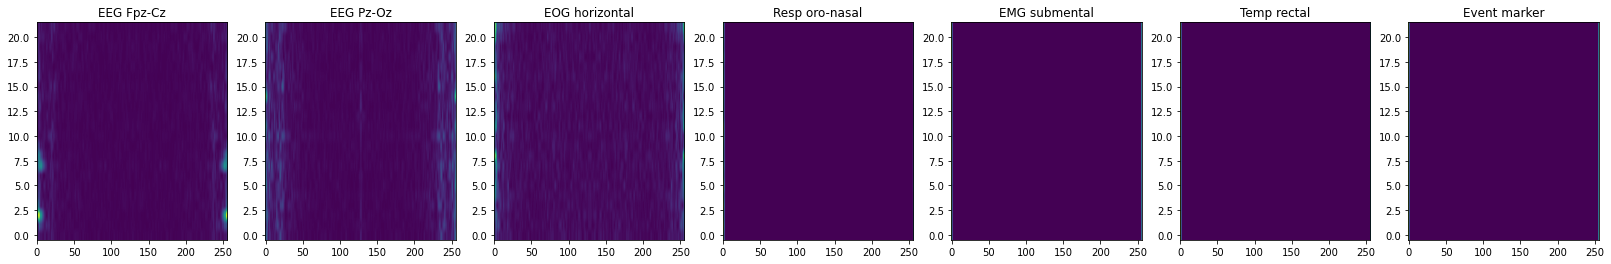

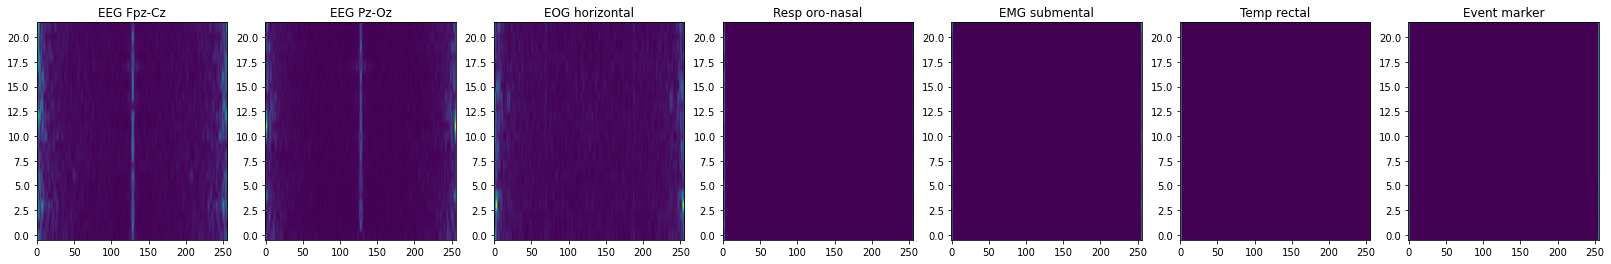

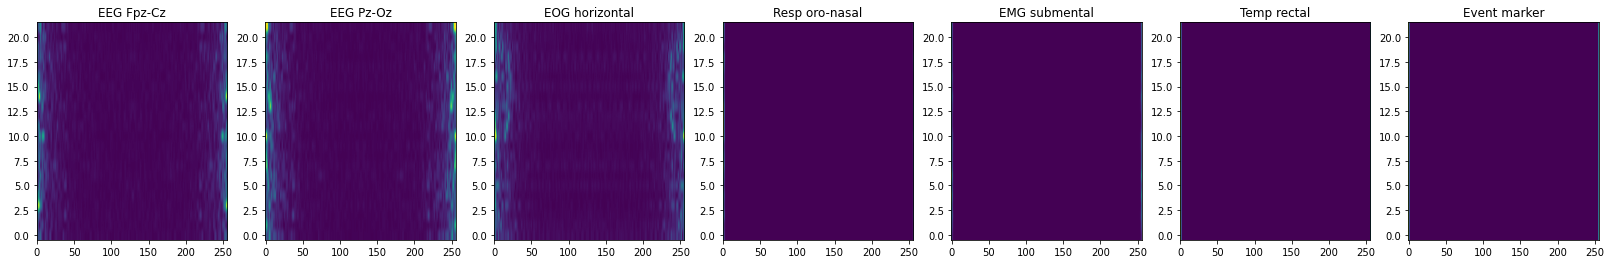

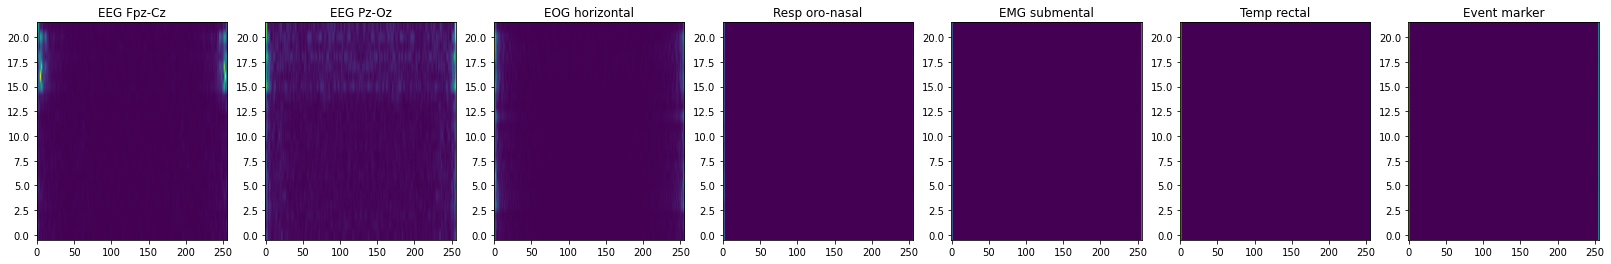

In [11]:
for i in range(10):
    # npyファイルを読み込む
    fig, axs = plt.subplots(1, len(channels), figsize=(28, 4))
    data = np.load(npy_files[i]).T
    for j, ch in enumerate(channels):
        dst = spectrogram(list(data[j]))
        axs[j].imshow(dst, aspect="auto", origin="lower")
        axs[j].set_title(ch)
    plt.show()